In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from pylab import rcParams
rcParams['figure.figsize'] = 25,10

In [47]:
#Clustering Analysis

In [6]:
states = pd.read_csv('../Datasets/03_03/ClusterData.csv')

In [8]:
list(states.columns.values)

['State',
 'state_code',
 'data science',
 'cluster analysis',
 'college',
 'startup',
 'entrepreneur',
 'ceo',
 'mortgage',
 'nba',
 'nfl',
 'mlb',
 'fifa',
 'modern dance',
 'prius',
 'escalade',
 'subaru',
 'jello',
 'bbq',
 'royal family',
 'obfuscation',
 'unicorn',
 'Extraversion',
 'Agreeableness',
 'Conscientiousness',
 'Neuroticism',
 'Openness',
 'PsychRegions',
 'region',
 'division']

In [12]:
st = states[states.columns[2:]]
st.index = states.iloc[:,1]

## Analysis

** Create Linkage Matrix for Clustering **

In [17]:
z = linkage(st, 'ward')

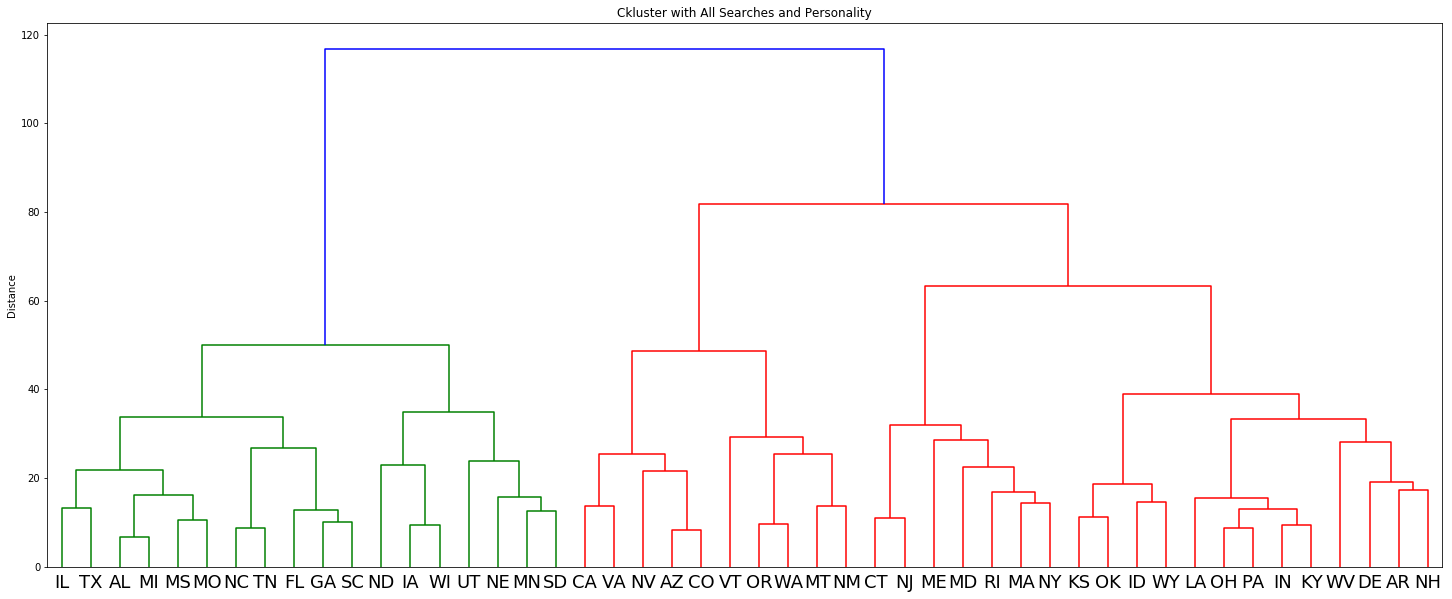

In [19]:
plt.figure(figsize = (25,10))
plt.title('Ckluster with All Searches and Personality')
plt.ylabel('Distance')
dendrogram(
    z,labels = st.index,
    leaf_rotation=0.,
    leaf_font_size = 18.,
)
plt.show()

In [21]:
## Classification

In [23]:
ccdefault = pd.read_csv('../Datasets/04_04/ccdefault.csv')

In [25]:
list(ccdefault.columns)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'DEFAULT']

In [29]:
ccd = ccdefault[ccdefault.columns[1:]]
ccd.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [32]:
test_idx = np.random.uniform(0,1,len(ccd)) <= .333
train = ccd[test_idx == True]
test = ccd[test_idx == False]

In [33]:
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0
14,250000,1,1,2,29,0,0,0,0,0,...,59696,56875,55512,3000,3000,3000,3000,3000,3000,0
15,50000,2,3,3,23,1,2,0,0,0,...,28771,29531,30211,0,1500,1100,1200,1300,1100,0
16,20000,1,1,2,24,0,0,2,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1


In [ ]:
## Analysis

In [38]:
features = [ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT' ]

In [39]:
n = 5 # Neighbors
results = []
clf = KNeighborsClassifier(n_neighbors=n)
clf.fit(train[features], train['DEFAULT'])
preds = clf.predict(test[features])
accuracy = np.where(preds == test['DEFAULT'], 1,0).sum() / float(len(test)) * 100


In [40]:
print("Neighbors", n, round(accuracy, 2))


Neighbors 5 75.13


In [ ]:
print("Neighbors", n, round(accuracy, 2))


In [41]:
## Outliers - Anonalies

In [48]:
df = pd.read_csv('../Datasets/AnomalyData.csv')

In [49]:
df.head()

,State,state_code,data science,cluster analysis,college,startup,entrepreneur,ceo,mortgage,nba,...,obfuscation,unicorn,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,PsychRegions,region,division
0,Alabama,AL,-1.00,-0.13,1.10,-0.68,0.15,-0.73,1.53,-0.74,...,-0.32,-1.03,55.5,52.7,55.5,48.7,42.7,1,3,6
1,Arizona,AZ,-0.42,-0.73,-0.10,0.11,0.57,0.25,0.95,0.38,...,0.38,0.10,50.6,46.6,58.4,38.1,54.7,2,4,8
2,Arkansas,AR,-0.66,-0.39,-0.64,-0.08,0.01,-0.66,-0.50,-0.71,...,-0.45,-0.32,49.9,52.7,41.0,56.2,40.3,1,3,7
3,California,CA,1.95,-0.62,-0.26,2.02,0.46,1.27,-0.97,1.46,...,0.70,-0.38,51.4,49.0,43.2,39.1,65.0,2,4,9
4,Colorado,CO,0.34,0.00,-0.61,1.49,0.05,0.33,1.38,-0.80,...,1.32,0.20,45.3,47.5,58.8,34.3,57.9,1,4,8


In [51]:
state_code = df["state_code"]
data = df.loc[:, 'data science':'Openness']

In [52]:
## Analysis - Univariate Outliers

In [53]:
param = 'modern dance'

In [56]:
#Get quantile values and IQR for outlier limits

qv1 = data[param].quantile(0.25)
qv2 = data[param].quantile(0.5)
qv3 = data[param].quantile(0.75)
qv_limit = 1.5 * (qv3 - qv1)

In [57]:
# Get positions of outliers and use state_code for labels
un_outliers_mask = (data[param] > qv3 + qv_limit) | (data[param] < qv1 - qv_limit)
un_outlier_data = data[param][un_outliers_mask]
un_outlier_name = state_code[un_outliers_mask]

Text(0,0.5,'modern dance')

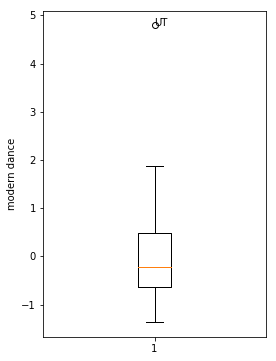

In [60]:
fig = pylab.figure(figsize = (4,6))
ax = fig.add_subplot(1,1,1)

for name , y in zip(un_outlier_name, un_outlier_data):
    ax.text(1,y,name)
    
ax.boxplot(data[param])
ax.set_ylabel(param)

In [61]:
## Association Analysis

#Frequent Itemsets
#Rule Generation


In [ ]:
## Text Mining
# Assessubg Authorship comparing Voices
# Clustering groups
# Sentiment Analysis in Social Media

#Categories 1) Focus on Meaning 2) Bag of Words

In [ ]:
#Bag of Words
#TFID
#Natural language Processing (NLP)
#Hidden Markov Models
# Latent Dirichlet Allocation

In [63]:
!sudo pip3 install nltk

[sudo] password for hamza: 

In [64]:
import nltk

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [68]:
import codecs
import re
import copy
import collections

import numpy as np
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from __future__ import division
import matplotlib

In [73]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hamza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
from nltk.corpus import stopwords

In [74]:
#Read Data

with codecs.open("../Datasets/JaneEyre.txt","r", encoding="utf-8") as f:
    jane_eyre = f.read()
    
with codecs.open("../Datasets/WutheringHeights.txt","r", encoding="utf-8") as f:
    wuthering_heights = f.read()
    


In [76]:
esw = stopwords.words('english')
esw.append('would')

In [77]:
word_pattern = re.compile("^\w+$")

In [86]:
def get_text_counter(text):

    porter_stemmer_stem = PorterStemmer().stem(text) 
    tokenizer = WordPunctTokenizer().tokenize(porter_stemmer_stem)
    tokens = tokenizer
    tokens = list(map(lambda x: x.lower(), tokens))
    tokens = [token for token in tokens if re.match(word_pattern, token) and token not in esw]
    return collections.Counter(tokens), len (tokens)
    

In [89]:
def make_df(counter, size):
    abs_freq = np.array([e1[1] for e1 in counter])
    rel_freq = abs_freq / size
    index = [e1[0] for e1 in counter]
    df = pd.DataFrame(data=np.array([abs_freq, rel_freq]).T, index=index, columns=["Absolutre Frequencey, Relative Frequency"])
    df.index.name = "Most Common Words"
    return df
    
    

In [91]:
obj = get_text_counter("Helo the happiness is but school would while and or hamza")
make_df(obj,len(obj))

['helo', 'the', 'happiness', 'is', 'but', 'school', 'would', 'while', 'and', 'or', 'hamza']


TypeError: 'int' object is not subscriptable